## HDP-HMM ELBO objective

In our recent manuscript, we see that the HDP-HMM objective has the following term:

\begin{align}
\mathcal{L}_{\mbox{hdp-local}}(s, \theta, \rho, \omega) 
&\triangleq 
\mathbb{E}[ c_D(\alpha_0 \beta ) ]
+ \sum_{k=1}^K \mathbb{E}[ c_D(\alpha \beta + \kappa \delta_k ]
\\
& - \sum_{k=0}^K c_D(\theta_k)
\\
& + \sum_{k=0}^K \sum_{\ell=1}^{K+1}
( 
M_{k\ell}
+ \alpha_{k} 
\mathbb{E}_{q(u)}[\beta_{\ell}]
+  \kappa \delta_k(\ell)
-  \theta_{k\ell}
) P_{k\ell}
\end{align}

where we defined $M_{k\ell}$ as a count sufficient statistic, and $P_{k\ell}$ as a log probability statistic.

\begin{align}
M_{k\ell} &\triangleq \mathbb{E}[ \sum_{n} \sum_{t} z_{ntk} z_{n,t+1,\ell} ] = \sum_{n=1}^N \sum_{t=1}^{T_n-1} s_{ntk\ell}
\\
P_{k\ell} &\triangleq \mathbb{E}[ \log \pi_{k\ell} ] = \psi(\theta_{k\ell}) - \psi(\theta_{k\cdot} )
\end{align}

The last term of $\mathcal{L}_{\mbox{hdp-local}}$, involving $M$, and $P$, is called the **slack** term. Immediately after a global update, this term is precisely equal to zero, since $\theta_{k\ell}$ is set equal to $M_{k\ell} + \alpha + \kappa$.

In [2]:
import bnpy

In [3]:
%pylab inline
bnpy.viz.PlotUtil.ConfigPylabDefaults(pylab)

Populating the interactive namespace from numpy and matplotlib


## Create a toy dataset of 2 sequences, of **different** lengths

In [5]:
import SeqOfBinBars9x9

In [6]:
Data = SeqOfBinBars9x9.get_data(nDocTotal=2, T='100,300')

## Sequence 1/2: 100 timesteps long

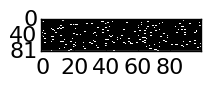

In [18]:
pylab.figure(figsize=(2,1))
pylab.imshow(Data.X[:Data.doc_range[1]].T, aspect=0.25, cmap='bone', interpolation='nearest');
pylab.yticks([0,40,81]);

## Sequence 2/2: 300 timesteps long

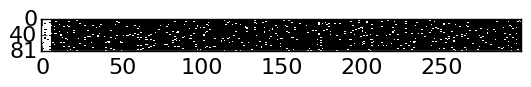

In [19]:
pylab.figure(figsize=(6,1))
pylab.imshow(Data.X[Data.doc_range[1]:Data.doc_range[2]].T, aspect=0.25, cmap='bone', interpolation='nearest');
pylab.yticks([0,40,81]);

## Run memoized, as a baseline

In [59]:
bnpy.run(Data, 'HDPHMM', 'Bern', 'moVB', nLap=1000, minLap=300, printEvery=25, 
        K=5, initname='randexamples',
        jobname='test-alg=memo');

Binary Bar Sequences with 20 true topics.
Entire Dataset Summary:
  total size: 2 units
  batch size: 1 units
  num. batches: 2
Data for Initialization:
  size: 2 units (documents)
  dimension: 81
Allocation Model:  None
Obs. Data  Model:  Bernoulli over 81 binary attributes.
Obs. Data  Prior:  Beta over 81 attributes.
  lam1 = [ 0.1  0.1] ...
  lam0 = [ 0.1  0.1] ...
  
Learn Alg: moVB
Trial  1/1 | alg. seed: 8204544 | data order seed: 8541952
savepath: /results/SeqOfBinBars9x9/test-alg=memo/1
    0.500/1000 after      0 sec. | K    5 | ev -2.592987794e-01 |  
        1/1000 after      0 sec. | K    5 | ev -2.555258144e-01 |  
    1.500/1000 after      0 sec. | K    5 | ev -2.553482239e-01 | Ndiff    0.489 
   25.000/1000 after      1 sec. | K    5 | ev -2.485689323e-01 | Ndiff    0.000 
   50.000/1000 after      1 sec. | K    5 | ev -2.485689323e-01 | Ndiff    0.000 
   75.000/1000 after      2 sec. | K    5 | ev -2.485689323e-01 | Ndiff    0.000 
  100.000/1000 after      2 sec. | K

### Run stochastic WITH slack

This run is from same initialization as before, doing stochastic updates. 

The ELBO we track along the way does NOT include the slack term.

In [69]:
bnpy.run(Data, 'HDPHMM', 'Bern', 'soVB', nLap=1000, minLap=10, printEvery=250, 
        K=5, initname='randexamples',
        useSlackTermsInELBO=1,
        jobname='test-alg=stochWithSlack');

Binary Bar Sequences with 20 true topics.
Entire Dataset Summary:
  total size: 2 units
  batch size: 1 units
  num. batches: 2
Data for Initialization:
  size: 2 units (documents)
  dimension: 81
Allocation Model:  None
Obs. Data  Model:  Bernoulli over 81 binary attributes.
Obs. Data  Prior:  Beta over 81 attributes.
  lam1 = [ 0.1  0.1] ...
  lam0 = [ 0.1  0.1] ...
  
Learn Alg: soVB
Trial  1/1 | alg. seed: 8204544 | data order seed: 8541952
savepath: /results/SeqOfBinBars9x9/test-alg=stochWithSlack/1
    0.500/1000 after      0 sec. | K    5 | ev  2.228872957e-01 |  lrate 0.7071
        1/1000 after      0 sec. | K    5 | ev -1.169879467e-01 |  lrate 0.5774
    1.500/1000 after      0 sec. | K    5 | ev  1.304351955e+00 |  lrate 0.5000
  250.000/1000 after      7 sec. | K    5 | ev -2.537970981e-01 |  lrate 0.0447
  500.000/1000 after     13 sec. | K    5 | ev -2.441849366e-01 |  lrate 0.0316
  750.000/1000 after     19 sec. | K    5 | ev -2.440020932e-01 |  lrate 0.0258
  1000.000

### Run stochastic WITHOUT slack

This run is from same initialization as before, doing all the same updates. The only difference is the ELBO we track along the way does NOT include the slack term.

In [70]:
bnpy.run(Data, 'HDPHMM', 'Bern', 'soVB', nLap=1000, minLap=10, printEvery=250, 
        K=5, initname='randexamples',
        useSlackTermsInELBO=0,
        jobname='test-alg=stochWithoutSlack');

Binary Bar Sequences with 20 true topics.
Entire Dataset Summary:
  total size: 2 units
  batch size: 1 units
  num. batches: 2
Data for Initialization:
  size: 2 units (documents)
  dimension: 81
Allocation Model:  None
Obs. Data  Model:  Bernoulli over 81 binary attributes.
Obs. Data  Prior:  Beta over 81 attributes.
  lam1 = [ 0.1  0.1] ...
  lam0 = [ 0.1  0.1] ...
  
Learn Alg: soVB
Trial  1/1 | alg. seed: 8204544 | data order seed: 8541952
savepath: /results/SeqOfBinBars9x9/test-alg=stochWithoutSlack/1
    0.500/1000 after      0 sec. | K    5 | ev -2.713983424e-01 |  lrate 0.7071
        1/1000 after      0 sec. | K    5 | ev -2.564625437e-01 |  lrate 0.5774
    1.500/1000 after      0 sec. | K    5 | ev -2.577233647e-01 |  lrate 0.5000
  250.000/1000 after      6 sec. | K    5 | ev -2.453570818e-01 |  lrate 0.0447
  500.000/1000 after     13 sec. | K    5 | ev -2.453557659e-01 |  lrate 0.0316
  750.000/1000 after     18 sec. | K    5 | ev -2.453555183e-01 |  lrate 0.0258
  1000.

## Plot: Training objective as more data is seen

The black curve (stochastic with the slack term) has HUGE variation. This is due (I think) to oscillation between the two batches, since the scale changes from T=100 to T=300 depending on which batch is chosen.

However, the red curve (stochastic without the slack term) looks much cleaner. 

As expected, both versions of stochastic (red and black) converge to similar quality objective values, just the black has much more variation.

We can see the standard fixed truncation memoized alg (magenta) hiding under the black curve. It reaches a worse fixed point than either black or red.

(-0.3, -0.2)

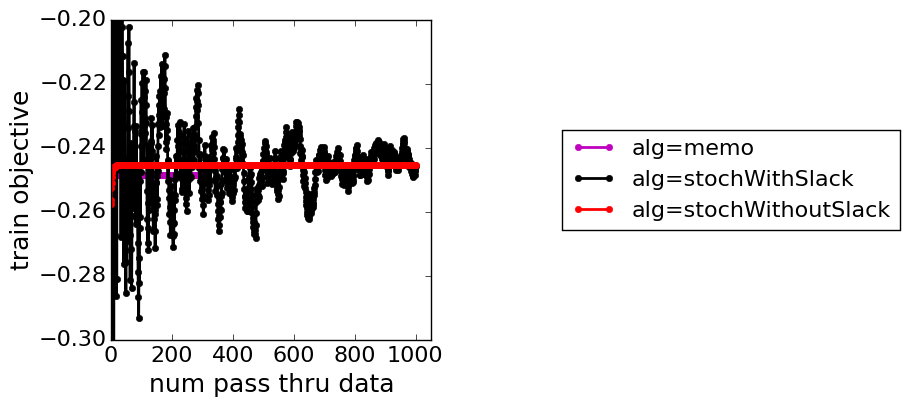

In [66]:
bnpy.viz.PlotTrace.Colors = ['m', 'k', 'r']
bnpy.viz.PlotELBO.plotJobsThatMatch('SeqOfBinBars9x9/test-*',
                                   loc='center right', bbox_to_anchor=(2.5, 0.5));
pylab.ylim([-0.3, -.2])